## Load Data

In [1]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [2]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Weight Increasing (std=10)

In [3]:
# solution 1: increase weight value

#################### YOUR CODE HERE ####################
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=10.)

# Đặt initializer ở trên vào các layer có ký hiệu #??
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(10))
########################################################


# optimizer and loss
model.compile(optimizer=keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=300, verbose=2)

Epoch 1/300
118/118 - 4s - loss: 2.3974 - accuracy: 0.1027 - val_loss: 2.3580 - val_accuracy: 0.1083 - 4s/epoch - 35ms/step
Epoch 2/300
118/118 - 3s - loss: 2.3494 - accuracy: 0.1061 - val_loss: 2.3422 - val_accuracy: 0.1116 - 3s/epoch - 22ms/step
Epoch 3/300
118/118 - 3s - loss: 2.3382 - accuracy: 0.1104 - val_loss: 2.3312 - val_accuracy: 0.1106 - 3s/epoch - 23ms/step
Epoch 4/300
118/118 - 2s - loss: 2.3293 - accuracy: 0.1142 - val_loss: 2.3205 - val_accuracy: 0.1202 - 2s/epoch - 21ms/step
Epoch 5/300
118/118 - 2s - loss: 2.3190 - accuracy: 0.1210 - val_loss: 2.3116 - val_accuracy: 0.1277 - 2s/epoch - 21ms/step
Epoch 6/300
118/118 - 2s - loss: 2.3115 - accuracy: 0.1216 - val_loss: 2.3120 - val_accuracy: 0.1205 - 2s/epoch - 20ms/step
Epoch 7/300
118/118 - 2s - loss: 2.3040 - accuracy: 0.1268 - val_loss: 2.2970 - val_accuracy: 0.1330 - 2s/epoch - 20ms/step
Epoch 8/300
118/118 - 2s - loss: 2.3001 - accuracy: 0.1300 - val_loss: 2.2974 - val_accuracy: 0.1303 - 2s/epoch - 19ms/step
Epoch 9/

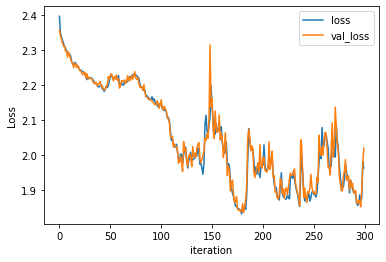

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

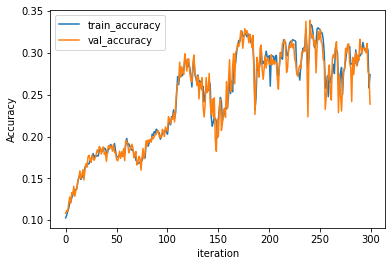

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()